In [2]:
# install necessary libraries

!pip3 install --upgrade extcolors

import math
import PIL
import extcolors
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib import gridspec

In [24]:
# Define our top level function

def study_image(image_path):
    img = fetch_image(image_path)
    colors = extract_colors(img)
    color_palette = render_color_platte(colors)
    overlay_palette(img, color_palette)

Define our helper functions:
- fetch_img(img_path) - grabs the image via the URL and stores it in local memory
- extract_colors(image) - extracts the most frequent colors up to a defined limit and based on a tolerance threshold. returns an array of tuples of tupe '(color.rgb,color.count)'
- render_palett(colors) - generates grid of colors from those extracted on a canvas that we can plot
- overalay_palette(image, palette) - takes original image and rendered color palette and creates a new image using matplotlib



In [25]:
def fetch_image(image_path):
    urllib.request.urlretrieve(image_path, "image")
    img = PIL.Image.open("image")
    return img

def extract_colors(img):
    tolerance = 32
    limit = 24
    colors, pixel_count = extcolors.extract_from_image(img, tolerance, limit)
    return colors

def render_color_platte(colors):
    size = 100
    columns = 6
    width = int(min(len(colors), columns) * size)
    height = int((math.floor(len(colors) / columns) + 1) * size)
    result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    canvas = ImageDraw.Draw(result)
    for idx, color in enumerate(colors):
        x = int((idx % columns) * size)
        y = int(math.floor(idx / columns) * size)
        canvas.rectangle([(x, y), (x + size - 1, y + size - 1)], fill=color[0])
        return result

def overlay_palette(img, color_palette):
    nrow = 2
    ncol = 1
    f= plt.figure(figsize=(20,30), facecolor='None', edgecolor='k', dpi=55, num=None)
    gs = gridspec.GridSpec(nrow, ncol, wspace=0.0, hspace=0.0) 
    f.add_subplot(2, 1, 1)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    f.add_subplot(1, 2, 2)
    plt.imshow(color_palette, interpolation='nearest')
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0, bottom=0)
    plt.show(block=True)

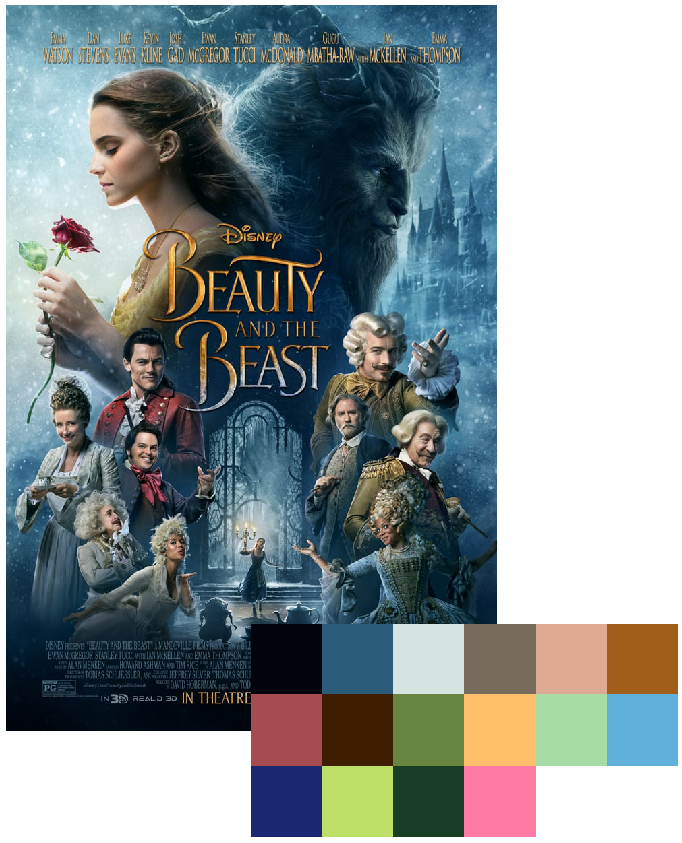

In [28]:
img_url = 'https://media1.popsugar-assets.com/files/thumbor/z5oKgNC9S4DS6Bay78Aoy5aLO4s/fit-in/728xorig/filters:format_auto-!!-:strip_icc-!!-/2017/01/26/813/n/1922283/055dc333c3280d59_BeautyAndTheBeast58726d5b9fac8/i/Beauty-Beast-2017-Movie-Posters.jpg'
study_img(img_url)